## 1. Basic Data Exploration and Pandas Operations

#### Exercise 1: Load and Inspect the Data

In [165]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chi2, chi2_contingency

In [12]:
# Load the dataset
df = pd.read_csv('results.csv')

# Display the first 10 rows
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,13/07/1930,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay
1,13/07/1930,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay
2,14/07/1930,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay
3,14/07/1930,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay
4,15/07/1930,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay


In [13]:
# Display the last 5 rows
df.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country
1296,10/12/2022,England,France,1,2,FIFA World Cup,Al Khor,Qatar
1297,13/12/2022,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar
1298,14/12/2022,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar
1299,17/12/2022,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar
1300,18/12/2022,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar


#### Exercise 2: Data Summary and Statistics

In [14]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1301 non-null   object
 1   home_team   1301 non-null   object
 2   away_team   1301 non-null   object
 3   home_score  1301 non-null   int64 
 4   away_score  1301 non-null   int64 
 5   tournament  1301 non-null   object
 6   city        1301 non-null   object
 7   country     1301 non-null   object
dtypes: int64(2), object(6)
memory usage: 81.4+ KB


In [15]:
# Basic statistics
df.describe()

,home_score,away_score
count,1301.000000,1301.000000
mean,1.505765,1.222137
std,1.428611,1.239976
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,8.000000


## 2. Data Cleaning and Manipulation

### Exercise 3: Add New Columns

In [23]:
# Add a new column for total goals
df['total_goals'] = df['home_score'] + df['away_score']

### Exercise 4: Filter and Sort Data - Games that ended in a Draw

In [44]:
# Filter matches that ended in a draw
draws = df[df['home_score'] == df['away_score']]
draws.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,year,total_goals
29,1934-05-31,Italy,Spain,1,1,FIFA World Cup,Florence,Italy,1934,2
35,1938-06-04,Germany,Switzerland,1,1,FIFA World Cup,Paris,France,1938,2
37,1938-06-05,Cuba,Romania,3,3,FIFA World Cup,Toulouse,France,1938,6
44,1938-06-12,Brazil,Czechoslovakia,1,1,FIFA World Cup,Bordeaux,France,1938,2
58,1950-06-28,Brazil,Switzerland,2,2,FIFA World Cup,São Paulo,Brazil,1950,4


In [51]:
# Sort by date
draws_sorted = draws.sort_values(by='date')

# Group by the home_score and away_score to count the occurrences of each score combination
draw_scores = draws_sorted.groupby(['home_score', 'away_score']).size()

# Sort the counts in descending order to find the most common score
draw_scores_sorted = draw_scores.sort_values(ascending=False)

# Display the most common draw score and its count
most_common_draw_score = draw_scores_sorted.head()
print("Most common draw score:\n", most_common_draw_score)

Most common draw score:
 home_score  away_score
1           1             135
0           0             108
2           2              43
3           3              11
4           4               2
dtype: int64


## 3. Grouping, Aggregation and Visualisation

### Exercise 5: Common WC/Euros Matchups

In [91]:
matchups = df.groupby(['home_team', 'away_team']).size().sort_values(ascending=False)
print(matchups.head(10))

home_team  away_team  
Italy      Spain          7
Germany    Italy          7
           Spain          6
           Netherlands    6
           Yugoslavia     5
England    Germany        5
Germany    Portugal       5
           Poland         5
England    Russia         5
Brazil     Sweden         5
dtype: int64


### Exercise 6: Mean Goals by Tournament

In [66]:
# Group by tournament and calculate the average goals
avg_goals_tournament = df.groupby('tournament')['total_goals'].mean()
print(avg_goals_tournament)

tournament
FIFA World Cup    2.821577
UEFA Euro         2.459941
Name: total_goals, dtype: float64


### Exercise 7: Mean Goals Over Time

In [92]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate average goals per match per year
df['year'] = df['date'].dt.year
avg_goals_by_tournament_year = df.groupby(['year', 'tournament'])['total_goals'].mean().reset_index().rename(columns={"total_goals":"mean_goals"})
avg_goals_by_tournament_year.head()

,year,tournament,mean_goals
0,1930,FIFA World Cup,3.888889
1,1934,FIFA World Cup,4.117647
2,1938,FIFA World Cup,4.666667
3,1950,FIFA World Cup,4.000000
4,1954,FIFA World Cup,5.384615


Some very high mean goals there - lets get more context

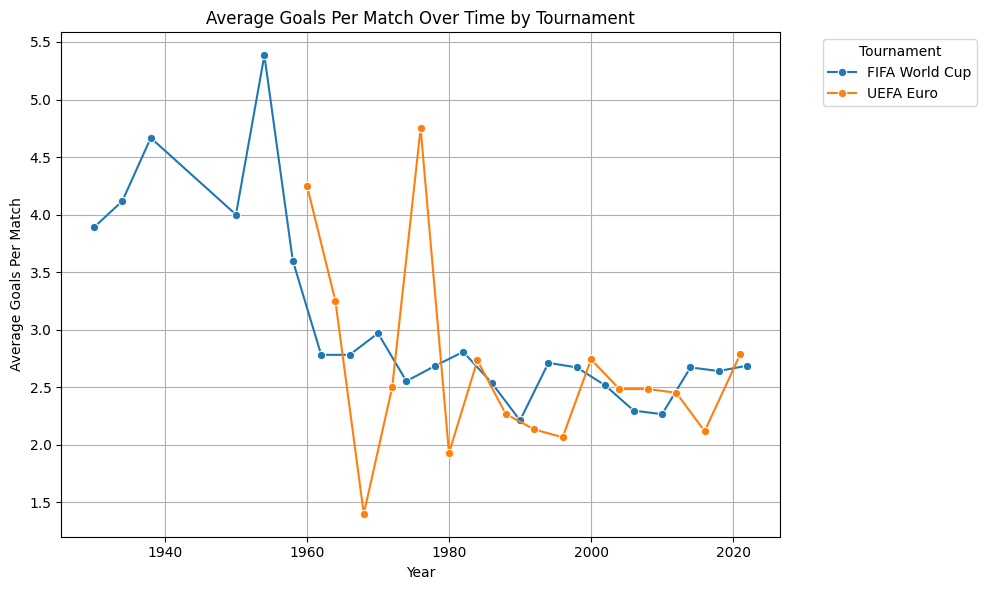

In [96]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_goals_by_tournament_year, x='year', y='mean_goals', hue='tournament', marker='o')
plt.title('Average Goals Per Match Over Time by Tournament')
plt.xlabel('Year')
plt.ylabel('Average Goals Per Match')
plt.legend(title='Tournament', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Some spikey averages, but it starts to normalise - lets check why

In [84]:
matches_per_year_tournament = df.groupby(['year', 'tournament']).size().reset_index(name='match_count')

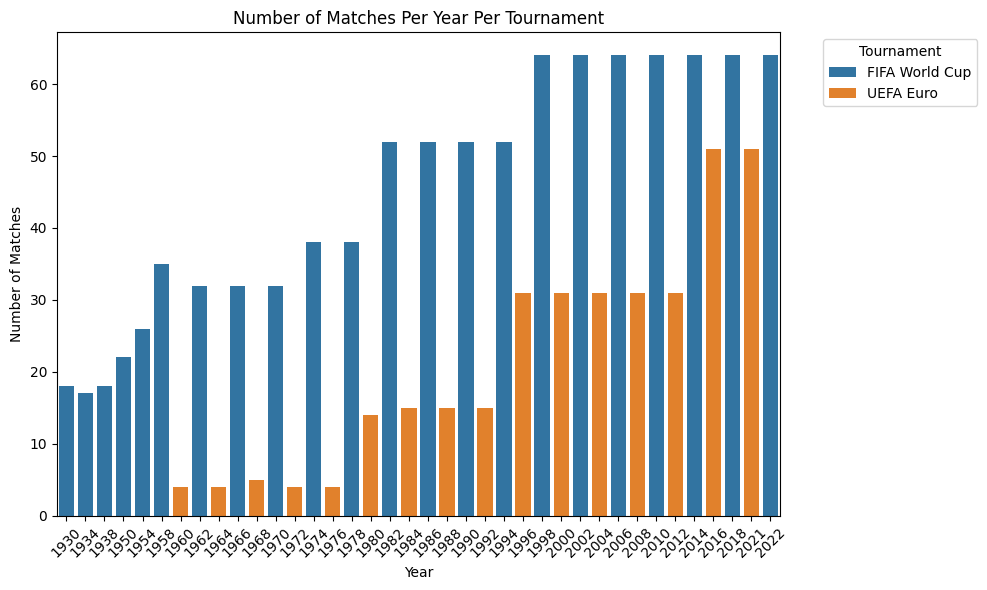

In [85]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Plot the data using a bar plot
sns.barplot(data=matches_per_year_tournament, x='year', y='match_count', hue='tournament')

# Customize the plot
plt.title('Number of Matches Per Year Per Tournament')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.legend(title='Tournament', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

The more games played, the more the average starts to stabalise - with such few games, it was likely that the average goals scored was quite volatile

### Exercise 8: Goals Distribution

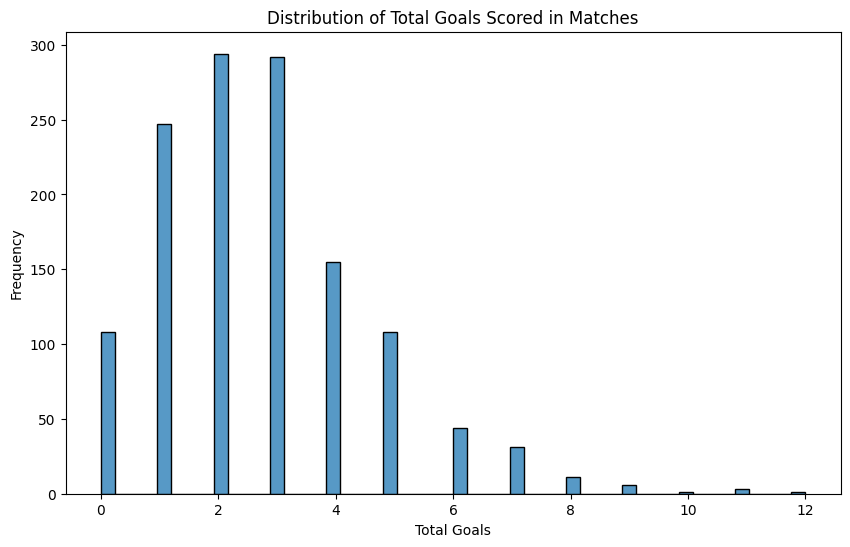

In [30]:
# Plot the distribution of total goals
plt.figure(figsize=(10, 6))
sns.histplot(df['total_goals'], bins=50)
plt.title('Distribution of Total Goals Scored in Matches')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

## 4: Penalties :(

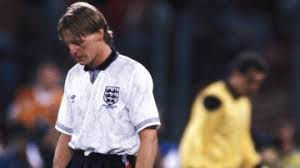

We'll take a look at a penatlty shootout dataset, Euros/WC since 1990

#### Exercise 9: Load and Explore the Dataset

In [171]:
# Load the dataset
shootouts_df = pd.read_csv('shootouts.csv')

# Display the first few rows of the dataset
shootouts_df.head()

,date,home_team,away_team,winner,first_shooter,tournament
0,1990-06-25,Republic of Ireland,Romania,Republic of Ireland,Romania,FIFA World Cup
1,1990-06-30,Yugoslavia,Argentina,Argentina,Argentina,FIFA World Cup
2,1990-07-03,Italy,Argentina,Argentina,Italy,FIFA World Cup
3,1990-07-04,Germany,England,Germany,England,FIFA World Cup
4,1992-06-22,Netherlands,Denmark,Denmark,Netherlands,UEFA Euro


In [159]:
# Display the last few rows of the dataset
shootouts_df.tail()

,date,home_team,away_team,winner,first_shooter,tournament
45,2022-12-05,Japan,Croatia,Croatia,Japan,FIFA World Cup
46,2022-12-06,Morocco,Spain,Morocco,Morocco,FIFA World Cup
47,2022-12-09,Croatia,Brazil,Croatia,Croatia,FIFA World Cup
48,2022-12-09,Netherlands,Argentina,Argentina,Netherlands,FIFA World Cup
49,2022-12-18,Argentina,France,Argentina,France,FIFA World Cup


In [160]:
# Print some basic info about the dataset
shootouts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           50 non-null     object
 1   home_team      50 non-null     object
 2   away_team      50 non-null     object
 3   winner         50 non-null     object
 4   first_shooter  50 non-null     object
 5   tournament     50 non-null     object
dtypes: object(6)
memory usage: 2.5+ KB


#### Exercise 10: Is there an advantage to taking the first penalty?

In [161]:
# First shooter wins
first_wins = shootouts_df[shootouts_df['first_shooter'] == shootouts_df['winner']].shape[0]

# Second shooter wins
second_wins = shootouts_df[shootouts_df['first_shooter'] != shootouts_df['winner']].shape[0]

# Total shootouts
total_shootouts = shootouts_df.shape[0]

# Calculate win rates
win_rate_first_shooter = first_wins / total_shootouts
win_rate_second_shooter = second_wins / total_shootouts

# Display the win rates
print(f"Win rate for the first shooter: {win_rate_first_shooter:.2%}")
print(f"Win rate for the second shooter: {win_rate_second_shooter:.2%}")

Win rate for the first shooter: 52.00%
Win rate for the second shooter: 48.00%


Yes, there appears to be an advantage unless you are England.

#### Exercise 11: Who has the best record in shootouts?

In [142]:
# Calculate the total number of shootouts each team participated in
home_shootouts = shootouts_df['home_team'].value_counts()
away_shootouts = shootouts_df['away_team'].value_counts()

# Combine both home and away shootouts for total shootouts per team
total_shootouts = home_shootouts.add(away_shootouts, fill_value=0)

# Calculate the number of wins for each team
win_counts = shootouts_df['winner'].value_counts()

In [143]:
# Combine both total shootouts and win counts into a DataFrame
records = pd.DataFrame({
    'total_shootouts': total_shootouts,
    'wins': win_counts
}).fillna(0)  # Fill NaN values with 0

# Calculate the win rate for each team
records['win_rate'] = records['wins'] / records['total_shootouts']

In [147]:
# Filter the dataset to teams that have been in at least 4 shootouts, sorted by win rate
records[records['total_shootouts']>3].sort_values('win_rate', ascending=False) 

,total_shootouts,wins,win_rate
Germany,4.0,4.0,1.000000
Argentina,7.0,6.0,0.857143
Croatia,5.0,4.0,0.800000
Brazil,4.0,3.0,0.750000
Portugal,4.0,3.0,0.750000
Italy,10.0,5.0,0.500000
Spain,9.0,4.0,0.444444
France,6.0,2.0,0.333333
Netherlands,8.0,2.0,0.250000
Switzerland,4.0,1.0,0.250000


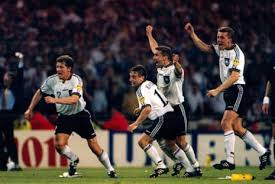

#### Appendix - Chi-Square Test

Is there a statistically significant association between being the first shooter and winning the shootout?

In [180]:
# Create a column to indicate if the first shooter won the shootout
shootouts_df['first_shooter_wins'] = shootouts_df['first_shooter'] == shootouts_df['winner']

# Count the number of wins and losses for the first and second shooters
first_wins = shootouts_df['first_shooter_wins'].sum()
first_losses = len(shootouts_df) - first_wins

# Construct the contingency table
contingency_table = pd.DataFrame({
    'Outcome': ['Win', 'Lose'],
    'First Shooter': [first_wins, first_losses],
    'Second Shooter': [first_losses, first_wins]
})

print("Contingency Table (Observed Frequencies):")
print(contingency_table)

Contingency Table (Observed Frequencies):
  Outcome  First Shooter  Second Shooter
0     Win             26              24
1    Lose             24              26


In [181]:
# Prepare the contingency table for chi2_contingency
observed_frequencies = contingency_table[['First Shooter', 'Second Shooter']].values

# Perform the chi-square test using chi2_contingency
chi2_stat, p_value, dof, expected_frequencies = chi2_contingency(observed_frequencies)

print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_frequencies)

# Interpretation
significance_level = 0.05
if p_value < significance_level:
    print("Reject the null hypothesis: There is a significant association between being the first shooter and winning the shootout.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between being the first shooter and winning the shootout.")



Chi-Square Statistic: 0.04
P-Value: 0.841480581121794
Degrees of Freedom: 1
Expected Frequencies:
[[25. 25.]
 [25. 25.]]
Fail to reject the null hypothesis: There is no significant association between being the first shooter and winning the shootout.


The high p-value of 0.8415 indicates that there is no statistically significant association between being the first shooter and winning the shootout, based on the data observed. In other words, the observed data does not provide enough evidence to reject the null hypothesis, which assumes that being the first shooter does not affect the outcome of winning the shootout.

If more data were collected:

- Increased Statistical Power: With more data points, the chi-square test could potentially detect smaller deviations from expected frequencies.
- Decreased P-Value: If being the first shooter truly has an effect (either positive or negative) on winning the shootout, more data could provide stronger evidence of this effect. This could potentially lead to a lower p-value, indicating a significant association between being the first shooter and winning.